# Linear Regression

In this tutorial we will implement a linear regression model. We will also implement a function that splits the available data into a training and a testing part.

## Problem Setting

We will use the Boston Housing Dataset. This dataset contains information collected by the U.S Census Service concerning housing in the city of Boston in the state of Massachusetts in 1978. Our goal is to predict the median value of the houses in a particular town in the city of Boston given its attributes. Check the file ’housing_features_description.txt’ for more information on the attributes.

In [95]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### NOTE: The boston dataset has an ethical problem. More on this can e.g. be found in the scikit documentation. ###
### Summary: The dataset contains the proportion of black people, which was assumed that racial self-segregation had a positive impact on house prices. ###


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]

df=pd.DataFrame(boston_data)
df.columns=['crime_rate','res_land_zoned','industry','charles_river','nox','avg_num_rooms','prop_bf_1940','dst_emply_center','rd_highway_idx','tax_rate','stdnt_tchr_ratio','prop_blacks','low_status_pct']

target = pd.DataFrame(boston_target,columns=["Price"])
X=boston_data
y=boston_target

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
df

,crime_rate,res_land_zoned,industry,charles_river,nox,avg_num_rooms,prop_bf_1940,dst_emply_center,rd_highway_idx,tax_rate,stdnt_tchr_ratio,prop_blacks,low_status_pct
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df.describe()

,crime_rate,res_land_zoned,industry,charles_river,nox,avg_num_rooms,prop_bf_1940,dst_emply_center,rd_highway_idx,tax_rate,stdnt_tchr_ratio,prop_blacks,low_status_pct
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Note 1:

Think about the ethical aspects of this dataset and machine learning in general. 
Can you always trust your data source? Can we use every possible information for our models?
- It will be a good idea to compare the data attributes and brief EDA with other data sources about the same topics. Using every possible information is good if the dataset provided is accurate

### Exercise 1

Write the *split_train_test(X,y,split,seed)*, given an instance matrix $X \in \mathbb{R}^{N \times D}$, labels $y \in Y^N$, a split ratio in $[0, 1]$ and a random seed $\in \mathbb{Z}$. Split the dataset in $(split×100)\%$ of the instances for training our model and the rest for testing, i.e. 

$$ \left|X_{\text{train}}\right| = \lceil \text{split} \cdot N \rceil, \qquad |X_{\text{train}}| + |X_{\text{test}}| = N. $$
Make sure you use the given random number generator seed so we all get the same results. The function is supposed to return:

- X_train, y_train: the training instances and labels;
- X_test, y_test: the test instances and labels,

in the same order as was mentioned.

Hint: It may be helpful to use shuffling functionality (e.g. np.random.shuffle).

In [9]:
def split_train_test(X,y,split,seed):
    ##################
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = split, random_state=seed)
    ##################
    return X_train, y_train, X_test, y_test

### Exercise 2

Write the function *train_linear_reg(X_train,y_train,lmbd)*.
Implement the ridge regression model (slide 24). The function should output the learned weight vector $\theta \in \mathbb{R}^D$ or $\mathbb{R}^{D+1}$ (depending on whether you are adding *bias*).

- For Lasso regression there will also be a analytical solution right with same equation as the ridge regression, just with lmbda in additon???????????????

In [180]:
def train_linear_reg(X, y, lmbd):
    ##################
    I = np.eye(X.shape[1]) # Creating an identity matrix of mxm
    
    inverse = np.linalg.inv(np.dot(X.T, X) + lmbd * I)
    #print(inverse.shape)
    theta = np.linalg.multi_dot([inverse,X.T,y])
    ##################
    return theta

### Exercise 3

Write the function *predict(X,theta)* which predicts housing values vector pred for a dataset X and a previously trained parameter vector $\theta$.

In [181]:
def predict(X, theta):
    ##################
    y_pred =np.dot(X,theta)
    ##################
    return y_pred

### Exercise 4

Write the function *mean_abs_loss(y_true,y_pred)* which computes the mean of the absolute differences between our prediction vector $y\_pred$ and the real housing values $y\_true$.

In [182]:
def mean_abs_loss(y_true,y_pred):
    ##################
    loss = np.mean(np.abs(y_true-y_pred))
    ##################
    return loss

### Exercise 5

Evaluate your solutions by running the following code. 

Moreover, answer the following questions: What is the most important feature in your model? Are there features that are not so important? What happens if you remove them? Are there outliers with a high absolute loss?

In [185]:
seed = 3
lmbd=1
split=0.7
X_train,y_train,X_test,y_test=split_train_test(X,y,split,seed)

theta=train_linear_reg(X_train,y_train,lmbd)

y_pred=predict(X_test,theta)

mae=mean_abs_loss(y_test,y_pred)

print(f"The mean absolute loss is {mae:0.3f}")

The mean absolute loss is 3.623


In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
rfr = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', random_state = 42)
y_train, y_test = np.ravel(y_train),np.ravel(y_test)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

mae=mean_abs_loss(y_test,y_pred)

print(f"The mean absolute loss is {mae:0.3f}")

The mean absolute loss is 2.364


### Using Feature Importance Plot & Correlation cf's to find the features that are least improvement

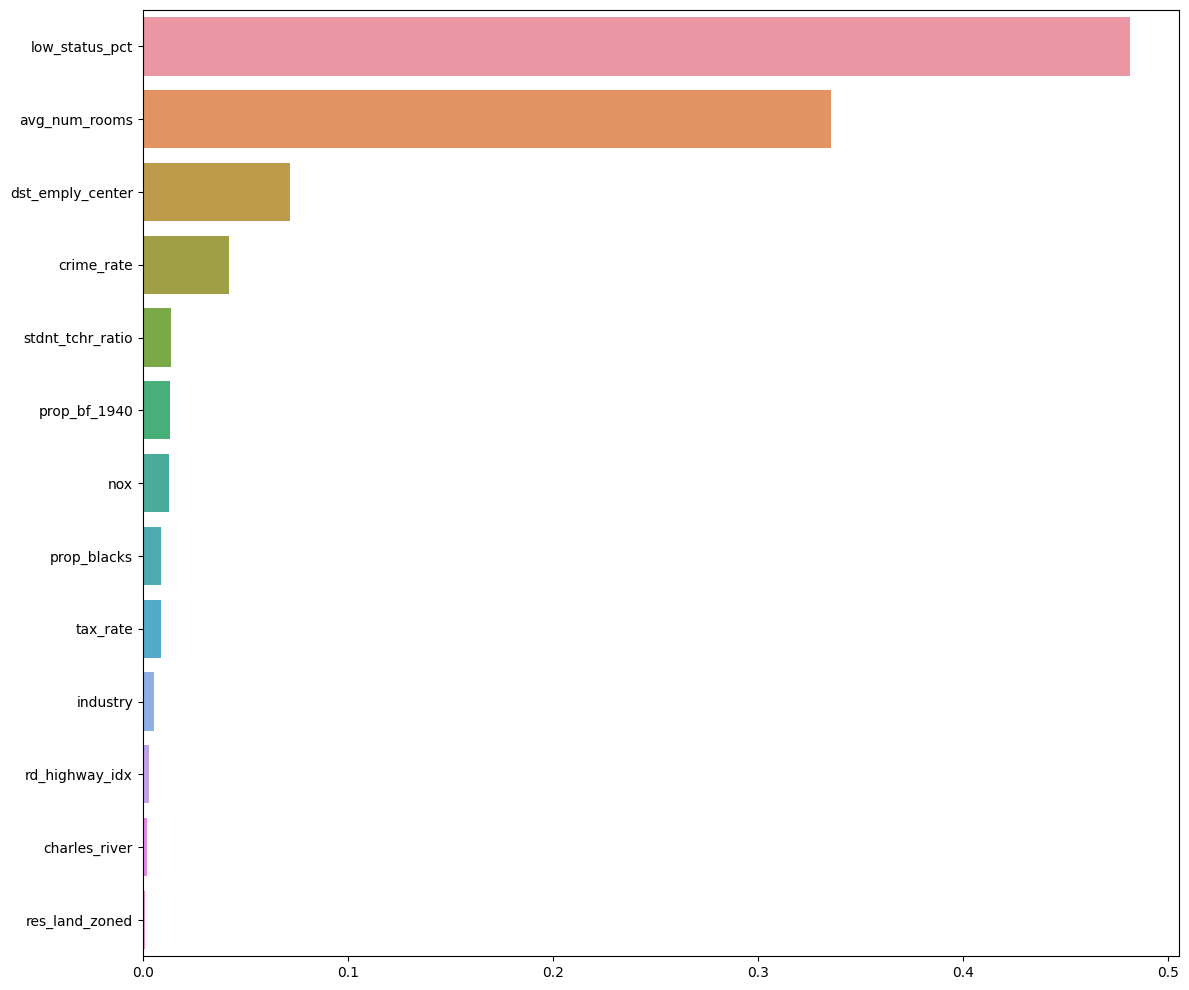

In [189]:
def feature_imp_plot(data,labels,seed):
    X_train, X_test, y_train,y_test = train_test_split(data, labels, test_size = 0.3, random_state=seed)
    rf = RandomForestRegressor(n_estimators=30, max_depth = 30, random_state = 42)
    y_train, y_test = np.ravel(y_train), np.ravel(y_test)
    rf.fit(X_train,y_train)
    imp_features = np.array((rf.feature_importances_))
    dc = dict(zip(data.columns,imp_features))
    dc = dict(sorted(dc.items(),key = lambda x:x[1],reverse = True))
    
    fig = plt.figure(figsize=(12, 10))
    sns.barplot(y=list(dc.keys()), x=list(dc.values()), orient='h')

    # Adjust the spacing between y-ticks
    ax = plt.gca()
    ax.set_yticklabels(list(dc.keys()))
    ax.tick_params(axis='y', which = 'minor', pad=220)  # Adjust the padding between entries

    fig.tight_layout()
    plt.show()
    return list(dc.keys())[-4:]

rf_less_cor = feature_imp_plot(df,target,3)

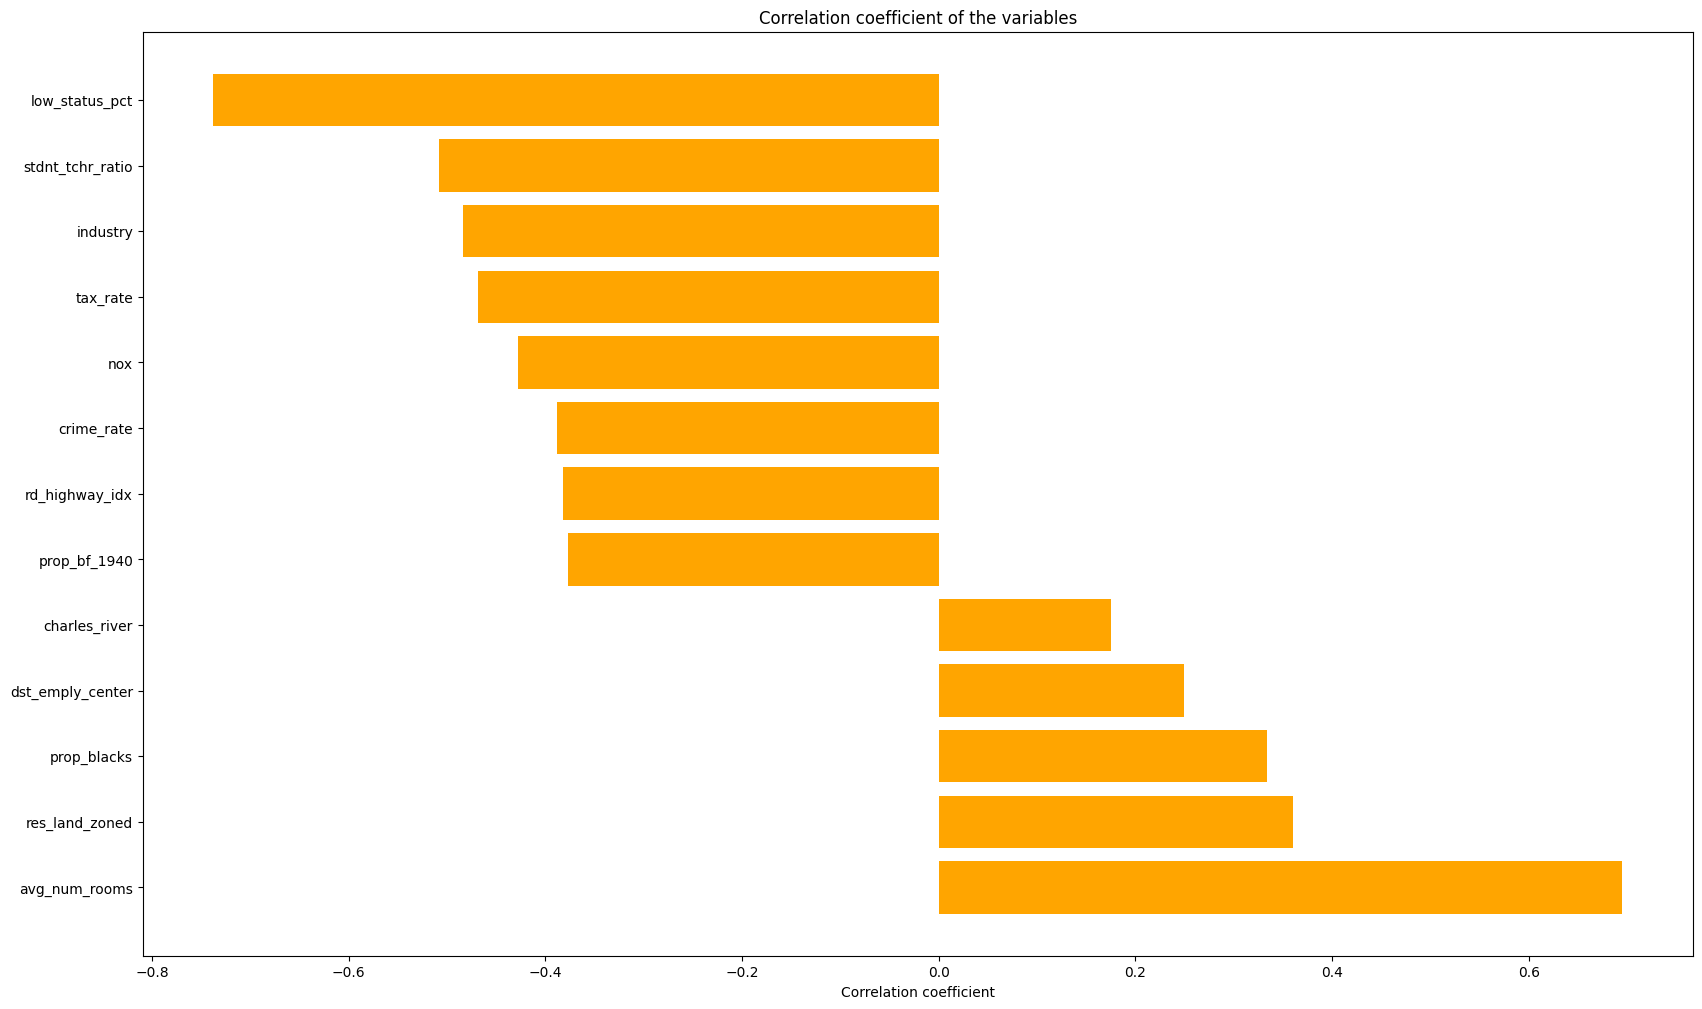

In [190]:
#### Use of Correlation cf's between each column and house price for selecting features
labels = df.columns
values = []

for col in labels:
    values.append(np.corrcoef(df[col].values,target.values,rowvar=False)[0,1])

corr_df = pd.DataFrame({'col_labels':labels,'corr_values':values})
corr_df = (corr_df.sort_values(by = 'corr_values', ascending = False)).reset_index()

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(20,12))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='orange')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

#### So by taking consensus from the feature_importances and correlation plot we can train the model on data without these cols

In [193]:
less_corr_features = corr_df[(corr_df.corr_values>=-0.5) & (corr_df.corr_values<=0.5)].col_labels[:]
less_corr = less_corr_features.to_list()
less_corr_fs = list(set(less_corr)&set(rf_less_cor))
less_corr_fs

['rd_highway_idx', 'industry', 'charles_river', 'res_land_zoned']

### Dropping all the less important features from the consensus & obtaining the score

In [196]:
X_new = df.drop(less_corr_fs, axis = 1)
y = target

In [197]:
seed = 3
lmbd=1
split=0.7
X_train,y_train,X_test,y_test=split_train_test(X_new,y,split,seed)

theta=train_linear_reg(X_train,y_train,lmbd)

y_pred=predict(X_test,theta)

mae=mean_abs_loss(y_test,y_pred)

print(f"The mean absolute loss is {mae:0.3f}")

The mean absolute loss is 3.642


### Observations
- The mae has increased if we drop all the cols, so we can try dropping them one by one and drop only those that decrease the mae

In [198]:
seed = 3
lmbd=1
split=0.7
X_train,y_train,X_test,y_test=split_train_test(df,y,split,seed)
theta=train_linear_reg(X_train,y_train,lmbd)
y_pred=predict(X_test,theta)
mae=mean_abs_loss(y_test,y_pred)
baseline_mae = mae

# Step 2: Initialize the dropping_cols list
dropping_cols = []

# Step 3-9: Iterate over each column and compare MAE
for col in less_cor_fs:
    # Step 4: Create a new dataset by dropping the current column
    updated_X_train = X_train.drop(col, axis=1)
    updated_X_test = X_test.drop(col, axis=1)

    # Step 5: Train a new model and calculate the MAE
    theta=train_linear_reg(updated_X_train,y_train,lmbd)
    y_pred=predict(updated_X_test,theta)
    updated_mae=mean_abs_loss(y_test,y_pred)

    # Step 6-8: Compare MAE and add column to dropping_cols if it improves MAE
    if updated_mae < baseline_mae:
        dropping_cols.append(col)

# Print the columns that improve MAE
print("Columns to drop:", dropping_cols)

Columns to drop: ['industry', 'charles_river']


In [200]:
X_new = df.drop(dropping_cols, axis = 1)
y = target
seed = 3
lmbd=1
split=0.7
X_train,y_train,X_test,y_test=split_train_test(X_new,y,split,seed)

theta=train_linear_reg(X_train,y_train,lmbd)

y_pred=predict(X_test,theta)

mae=mean_abs_loss(y_test,y_pred)

print(f"The mean absolute loss after dropping {dropping_cols} is {mae:0.3f}")

The mean absolute loss after dropping ['industry', 'charles_river'] is 3.609


### By observation only dropping 'industry' leads to high score from those 2

In [203]:
X_new = df.drop(['industry'], axis = 1)
y = target
seed = 3
lmbd=1
split=0.7
X_train,y_train,X_test,y_test=split_train_test(X_new,y,split,seed)

theta=train_linear_reg(X_train,y_train,lmbd)

y_pred=predict(X_test,theta)

mae=mean_abs_loss(y_test,y_pred)

print(f"The mean absolute loss after dropping industry is {mae:0.3f}")

The mean absolute loss after dropping industry is 3.591
